In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv('/content/SalariesX.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco


In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency'],
      dtype='object')

**1 - Basic Data Exploration**

In [ ]:
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))
print("********************************************\nData types:")
print(df.dtypes)
print("********************************************\nMissing values:")
df.isnull().sum()

Number of rows: 148654
Number of columns: 12
********************************************
Data types:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
dtype: object
********************************************
Missing values:


Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
dtype: int64

**2 - Descriptive Statistics**

In [ ]:
salary_mean = df['TotalPay'].mean
salary_median = df['TotalPay'].median
salary_mode = df['TotalPay'].mode
salary_min = df['TotalPay'].min
salary_max = df['TotalPay'].max

In [ ]:
salary_describe = df['TotalPay'].describe()
salary_range = df['TotalPay'].max() - df['TotalPay'].min()
salary_std  = df['TotalPay'].std()

In [ ]:
print("********************************************\nThe Descriptive Statistics of TotalPay :")
print(salary_describe)
print("********************************************\nThe range of TotalPay :")
print(salary_range)
print("********************************************\nThe standard deviation of TotalPay :")
print(salary_std)

********************************************
The Descriptive Statistics of TotalPay :
count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64
********************************************
The range of TotalPay :
568213.56
********************************************
The standard deviation of TotalPay :
50517.00527394987


**3-Data Cleaning**

In [ ]:
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].mean(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].mean(), inplace=True)
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)
df = df.drop('Notes',axis  =1)

In [ ]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [ ]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco


For numeric columns (BasePay, OvertimePay, OtherPay, Benefits), missing values are replaced by their respective column average.
I think this is the most appropriate way to deal with such missing values .
As for the Notes column, we have deleted it permanently because it contains very many missing values. Almost the all column has missing values.

**4-Basic Data Visualization**

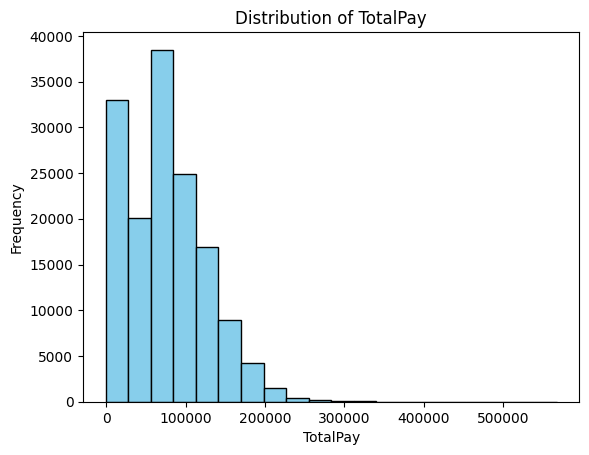

In [ ]:
plt.hist(df['TotalPay'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of TotalPay')
plt.xlabel('TotalPay')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['JobTitle'].nunique()

2159

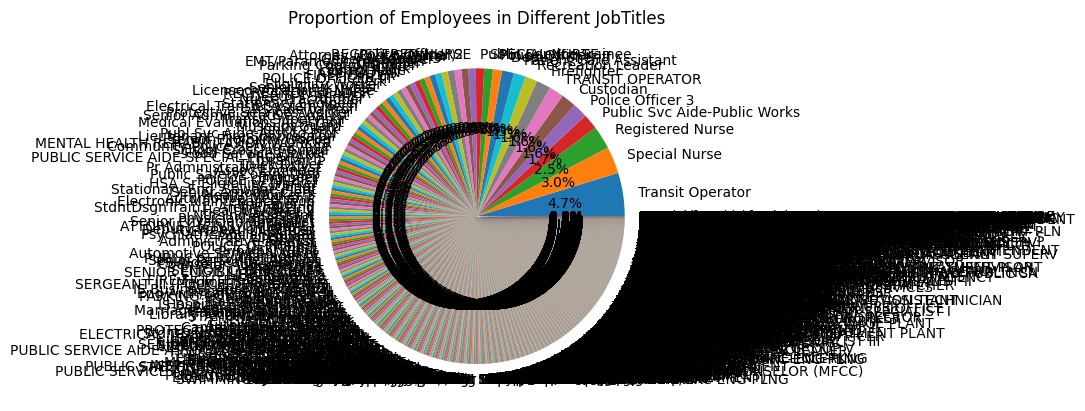

In [ ]:
JobTitle_pie = df['JobTitle'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Employees in Different JobTitles')
plt.show()


**5-Grouped Analysis**

In [ ]:
# Average TotalPay by JobTitle
JobTitle_stats = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False)
print("Average TotalPay by JobTitle :")
print(JobTitle_stats)

Grouped Analysis - Average TotalPay by JobTitle:
JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief Investment Officer                          339653.700000
Chief of Police                                   329183.646667
Chief, Fire Department                            325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
                                                      ...      
Commissioner 16.700c, No Pay                          25.760000
IS Technician Assistant                                0.000000
Not provided                                           0.000000
Public Safety Comm Tech                                0.000000
Drug Court Coordinator                                 0.000000
Name: TotalPay, Length: 2159, dtype: float64


**6-Simple Correlation Analysis**

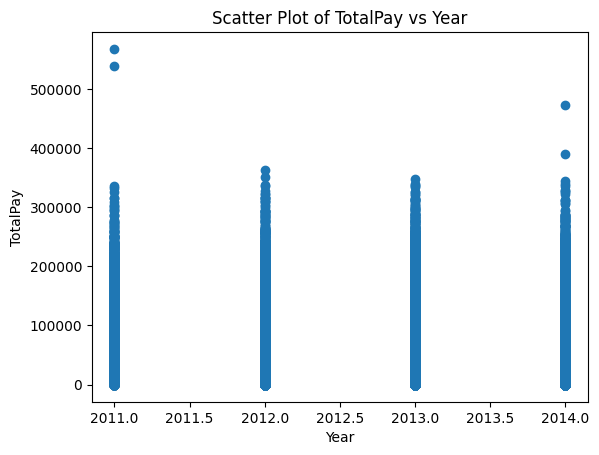

In [ ]:
correlation = df['TotalPay'].corr(df['Year'])
plt.scatter(df['Year'], df['TotalPay'])
plt.title('Scatter Plot of TotalPay vs Year')
plt.xlabel('Year')
plt.ylabel('TotalPay')
plt.show()

**7-Summary of Insights**

In [74]:
print("********************************************\nThe Descriptive Statistics of TotalPay :")
print(salary_describe)
print("********************************************\nThe range of TotalPay :")
print(salary_range)
print("********************************************\nThe standard deviation of TotalPay :")
print(salary_std)
print("********************************************\nAverage TotalPay by JobTitle :")
print(JobTitle_stats)

********************************************
The Descriptive Statistics of TotalPay :
count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64
********************************************
The range of TotalPay :
568213.56
********************************************
The standard deviation of TotalPay :
50517.00527394987
********************************************
Average TotalPay by JobTitle :
JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief Investment Officer                          339653.700000
Chief of Police                                   329183.646667
Chief, Fire Department                            325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
                                                      ...      
Commissioner 16.700c, No Pay                       

# Summary Report:
**Descriptive Statistics of TotalPay:**

Count: 148,654

Mean: $74,768.32

Standard Deviation: $50,517.01

Minimum: -$618.13

25th Percentile: $36,168.99

Median (50th Percentile): $71,426.61

75th Percentile: $105,839.14

Maximum: $567,595.43

**Insights:**

The dataset comprises 148,654 records of TotalPay.
The average TotalPay is $74,768.32, with a considerable standard deviation of $50,517.01, indicating notable variability in compensation.
Negative values for TotalPay suggest possible errors in the data or unique cases where employees might owe money (e.g., deductions).

**Range of TotalPay:**

Range: $568,213.56 .

The range of TotalPay is substantial, emphasizing the diversity in compensation levels across the dataset.
**Standard Deviation of TotalPay:**

Standard Deviation: $50,517.01 .

The high standard deviation implies a wide dispersion of TotalPay values around the mean, indicating varying compensation structures within the dataset.

**Average TotalPay by JobTitle:**

Top 5 Job Titles with Highest Average TotalPay:

1-GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY: $399,211.28

2-Chief Investment Officer: $339,653.70

3-Chief of Police: $329,183.65

4-Chief, Fire Department: $325,971.68

5-DEPUTY DIRECTOR OF INVESTMENTS: $307,899.46 .

Job titles significantly influence compensation, with top managerial roles like "GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY" and "Chief Investment Officer" commanding the highest average TotalPay.
Some job titles appear to have zero or negative TotalPay, suggesting potential data anomalies or specific roles with non-monetary compensation.

**Conclusion:**

The dataset provides a comprehensive view of TotalPay distribution.
Varied compensation levels and potential anomalies underscore the importance of data validation and cleansing.
Job titles play a crucial role in determining compensation, with managerial roles generally receiving higher TotalPay.